# Capstone project 

## Table of Contents:
1. Introduction / Business Problem
2. Data Collection 
3. Methodology: Data extraction, Data cleaning, Data Analysis, Data Modeling.
4. Results
5. Conclusion

## 1. Intorduction / Business Problem

In this project we will focus on the population comparision of the two cities, Canada and New York.

New York and Toronto, are both large and developed cities, and populated plays an essention role in determing following factors:

1. How much GDP the people  of the region / city are contributing to.
2. Populus cities can create employment and job opportunities can come up, since the economic contribution of the city is expected to increase.
3. The government can generate more tax, and funding for the wellfare of the nation can be increased, which includes development and construction of new fecilities and good exchange of goods and services. 

The current metro area population of Toronto in 2020 is 6,197,000, a 0.94% increase from 2019. The metro area population of Toronto in 2019 was 6,139,000, a 0.94% increase from 2018. The metro area population of Toronto in 2018 was 6,082,000, a 1.2% increase from 2017

New York City (NYC), often called simply New York, is the most populous city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York City is also the most densely populated major city in the United States.

### Problem Statement:
1. Comapre the number of neighbourhoods each city has.
2. Derive insights from that data to predict which city could be more populated in coming years. 

## 2. Data collection:

The data for Toronto will be collected from wikipedia and the data for New York city will be used from IBM database repository. (The reason to opt for IBM data repository is, there is a library / system error which refrains the "groups" keyword to be executed while structuring venue from Foursquare API.)

Link for CANADA DATASET: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

Link for NEW YORK dataset: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json

## 3. Methodology

1. Data extraction : Data wrangling, using beautiful soap and extract data from IBM data base
2. Data Cleaning / Data Preprocessing : Transforming the raw data into Data Frame and structuring the data using json.
3. Data Analysis/ Modeling : Performing visulaizations using folium library to represent data points of neighborhoods  from both datasets. Generating bar graphs. 

***

### Improting Essential Libraries:

In [59]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [60]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from bs4 import BeautifulSoup

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### 1. Data Extraction:

**Here we will extract the New York dataset and Canada dataset.**

First lets extract the data from New York data.

In [61]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [62]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [63]:
# declare the features in the dataset
neighborhoods_data = newyork_data['features']

In [64]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

***

### Now we will extract the toronto data set using web crawling

In [65]:
main_source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup = BeautifulSoup(main_source, 'lxml')

Table = soup.find("table")
Table_row = Table.tbody.find_all('tr')

res = []
for tr in Table_row:
    td = tr.find_all("td")
    row = [tr.text for tr in td]

    if row != [] and row != "Not assigned":
        
        if "Not assigned" in row[2]:
            row[2] = row[0]
        res.append(row)

web_df = pd.DataFrame(res, columns = ["PostalCode", "Borough", "Neighborhood"])
web_df = web_df.replace('\n','',regex=True)
web_df

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,M1A
1,M2A,Not assigned,M2A
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,M8A
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


***

### 2. Data Cleaning and Data Preprocessing

**Now we will transform NEW YORK data into a Data Frame**

In [66]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [67]:
# Now we will fill the data row by row into the generated data frame

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [68]:
print('The columns and rows the data frame contains {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The columns and rows the data frame contains 5 boroughs and 306 neighborhoods.


In [69]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


***

**Next we will clean the Toronto data that we wrangled from web**

In [70]:
# Here we are removing the rows containing NOT ASSIGNED data.
web_df = web_df[web_df.Borough != 'Not assigned']
web_df

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [71]:
# Now we will reset the index

web_df1 = web_df.reset_index(drop = True)
web_df1

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [72]:
# shape of the dataset
web_df1.shape

(103, 3)

In [73]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5fe7869a6ea44b6484b25ae323282f99 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='h2S6E-y8Nmt_Sdq21QPiiOeEnN1QA4mX1egnTur29iJZ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_5fe7869a6ea44b6484b25ae323282f99.get_object(Bucket='capstoneproject-donotdelete-pr-yspbcgfydcoh1v',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [74]:
toronto_df = pd.merge(web_df1, df_data_1, how = 'left', left_on = 'PostalCode', right_on = 'Postal Code')
toronto_df.drop("Postal Code", axis = 1, inplace = True)
toronto_df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


We have cleaned the data for NewYork city and Toronto city, and structured them into Data Frames in a structured format.  

***

### 3. Data Modeling and visualization

### Now we will generate the folium map of neighborhoods in new york city and torontoo city. This will give us insight to probelm 1 solution. 


**Using the geolocator and geocoder instance we will generate the neighborhoods in New york city using folium library.**

In [75]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [76]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In the above map we have all the neighborhoods of newyork city. Now let us plot the toronto neighborhoods and see what insight we get from it.

In [77]:
address = "Toronto, ON"

geolocator = Nominatim(user_agent = 'toronto_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("Coordinates for Totonto city {}, {}".format(latitude,longitude))

Coordinates for Totonto city 43.6534817, -79.3839347


In [78]:

toronto_map = folium.Map(location=[latitude, longitude], zoom_start = 10)
for Lati, Longi, borough, neigh_hood, in zip(toronto_df['Latitude'],toronto_df['Longitude'],toronto_df['Borough'],toronto_df['Neighborhood']):
    label = '{},{}'.format(neigh_hood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([Lati,Longi], radius = 5, popup=label,
                       color = 'blue',fill=True, fill_color = '#3186cc',
                       fill_opacity = 0.5, parse_html=False).add_to(toronto_map)

toronto_map

From the above graph we can clearly see that the number of neighborhoods in NYC are more than that of Totonto city

### Let us perform some bar graph visualization to get more insights and justify the results

First we will get the insights on New york data

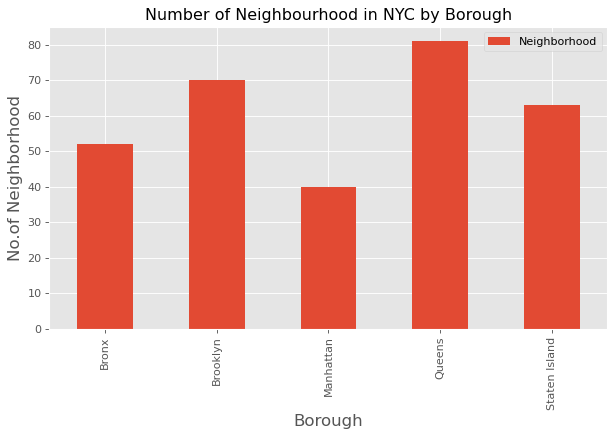

In [79]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Number of Neighbourhood in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
plt.show()

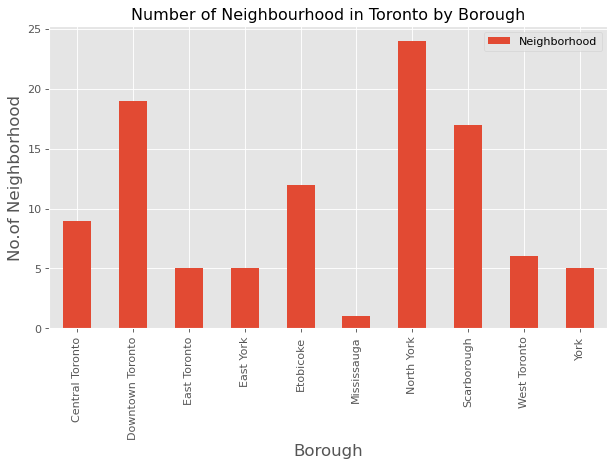

In [80]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Number of Neighbourhood in Toronto by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
toronto_df.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
plt.show()

Now let us pick the most populated Borough from both the cities to get further insight to the data.
From New York data we will select Queens 
From Toronto data we will select North York

From Queens and North York we will find the total number of venues to understand how populated neighborhoods can help in understanding consumer goods relation ship.

***

### 4. Results

## First we will evaluate Queens neighborhoods from New York data

In [81]:
Queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [96]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


In [83]:
# create map of Manhattan using latitude and longitude values
map_Queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Queens_data['Latitude'], Queens_data['Longitude'], Queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Queens)  
    
map_Queens

***

## Moving on to evaluating the neighbor map of North York Borough

In [94]:
NorthYork_data = toronto_df[toronto_df['Borough'] == 'North York'].reset_index(drop=True)
NorthYork_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills,43.745906,-79.352188
4,M6B,North York,Glencairn,43.709577,-79.445073


In [97]:
address = 'North York, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of North York are 43.7543263, -79.44911696639593.


In [99]:
# create map of Manhattan using latitude and longitude values
map_NorthYork = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(NorthYork_data['Latitude'], NorthYork_data['Longitude'], NorthYork_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NorthYork)  
    
map_NorthYork

***

## Improvisation and Discussion on project

The comparision of both the cities can be done more effectively by generating the most trending venues, based on that we can understand the preferences of the people in both the cities.

Unfortunately the "groups" KeyWord always throws error after connecting to Foresquare API while generating venues using latitude and longitude. Despite numerous attempts to restart, stop the kernel or generate a new notebook. 

## Conclusion:

The main focus of the project was to compare the number of neighborhoods present in New York City and Toronto City. 

This was done by fetching the data from the web and by performing the Data Science techinques. 
Folium maps are generated to present the number of neighborhoods of both the cities. Moreover, to get more clarity on the understanding of the data generated on the maps, bar plots were generated to find out the most populas borough with maximum neighborhoods. 

Queens in New york city and North York in toronto city had the highest number of neighborhoods.

Thus, we can say that the Boroughs in NYC are more likely to contribute higher to the city's GDP, Employment, tax, and other factors. 
On the other hand toronto city boroughs do not have similar impact on the contribution they can have on GDP, Employment, tax etc. 

We can clearly see that in the bar graphs since the total number of neighborhoods are less for toronto, than NYC.

This ends my work on the project Thank you.!